In [1]:
%load_ext autoreload
%autoreload 2

In [46]:
from everything import do_everything_before, do_everything_between, do_everything_after, get_train_command
import numpy as np
import os
import torch
from srcnn_files.srcnn import SRCNN
import matplotlib.pyplot as plt
from PIL import Image
from interpolate import linear_interpolate
from scipy import fft
import tifffile

In [3]:
TRAIN_DIR_TILED_90 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.0728_tiled/"
TRAIN_DIR_TILED_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.1092_tiled/"
TRAIN_DIR_TILED_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.1638_tiled/"
TRAIN_DIR_TILED_30 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.2184_tiled/"
TRAIN_DIR_TILED_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_tiled/"

TEST_DIR_TILED_90  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_tiled/"
TEST_DIR_TILED_60  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_tiled/"
TEST_DIR_TILED_40  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_tiled/"
TEST_DIR_TILED_30  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_tiled/"
TEST_DIR_TILED_20  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_tiled/"

SEG_TEST_DIR_90    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_tiled_segmentations/"
SEG_TEST_DIR_60    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_tiled_segmentations/"
SEG_TEST_DIR_40    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_tiled_segmentations/"
SEG_TEST_DIR_30    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_tiled_segmentations/"
SEG_TEST_DIR_20    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_tiled_segmentations/"

In [4]:
output_90 = do_everything_after(TRAIN_DIR_TILED_90,TEST_DIR_TILED_90,SEG_TEST_DIR_90)
percarr_90,cells_90,dists_90,duplicates_90,indices_90,excess_90 = output_90

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_tiled_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.0728_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0728_tiled_499.pth
2023-05-31 10:19:25,567 [INFO] ** TORCH GPU version installed and working. **
2023-05-31 10:19:25,568 [INFO] >>>> using GPU
2023-05-31 10:19:33,347 [INFO] 100%|##########| 5/5 [00:05<00:00,  1.17s/it]


In [5]:
# output_60 = do_everything_after(TRAIN_DIR_TILED_60,TEST_DIR_TILED_60,SEG_TEST_DIR_60)
# percarr_60,cells_60,dists_60,duplicates_60,indices_60,excess_60 = output_60

In [6]:
# output_40 = do_everything_after(TRAIN_DIR_TILED_40,TEST_DIR_TILED_40,SEG_TEST_DIR_40)
# percarr_40,cells_40,dists_40,duplicates_40,indices_40,excess_40 = output_40

In [7]:
# output_30 = do_everything_after(TRAIN_DIR_TILED_30,TEST_DIR_TILED_30,SEG_TEST_DIR_30)
# percarr_30,cells_30,dists_30,duplicates_30,indices_30,excess_30 = output_30

In [8]:
output_20 = do_everything_after(TRAIN_DIR_TILED_20,TEST_DIR_TILED_20,SEG_TEST_DIR_20)
percarr_20,cells_20,dists_20,duplicates_20,indices_20,excess_20 = output_20

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_tiled_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.3276_tiled_499.pth
2023-05-31 10:19:35,577 [INFO] ** TORCH GPU version installed and working. **
2023-05-31 10:19:35,578 [INFO] >>>> using GPU
2023-05-31 10:19:37,131 [INFO] 100%|##########| 5/5 [00:01<00:00,  3.62it/s]


In [9]:
TEST_DIR_TILED_90_LINEAR  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_tiled/"
TEST_DIR_TILED_60_LINEAR  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_tiled/"
TEST_DIR_TILED_40_LINEAR  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_tiled/"
TEST_DIR_TILED_30_LINEAR  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_tiled/"
TEST_DIR_TILED_20_LINEAR  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_tiled/"

SEG_TEST_DIR_90_LINEAR    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_linear_tiled_90x_segmentations/"
SEG_TEST_DIR_60_LINEAR    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_tiled_90x_segmentations/"
SEG_TEST_DIR_40_LINEAR    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_tiled_90x_segmentations/"
SEG_TEST_DIR_30_LINEAR    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_tiled_90x_segmentations/"
SEG_TEST_DIR_20_LINEAR    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_tiled_90x_segmentations/"

In [10]:
output_90_linear = do_everything_after(TRAIN_DIR_TILED_90,TEST_DIR_TILED_90,SEG_TEST_DIR_90)
percarr_90_linear,cells_90_linear,dists_90_linear,duplicates_90_linear,indices_90_linear,excess_90_linear = output_90_linear

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_tiled_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.0728_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0728_tiled_499.pth
2023-05-31 10:19:37,908 [INFO] ** TORCH GPU version installed and working. **
2023-05-31 10:19:37,908 [INFO] >>>> using GPU
2023-05-31 10:19:41,320 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.54it/s]


In [11]:
output_20_linear = do_everything_after(TRAIN_DIR_TILED_90,TEST_DIR_TILED_20_LINEAR,SEG_TEST_DIR_20_LINEAR)
percarr_20_linear,cells_20_linear,dists_20_linear,duplicates_20_linear,indices_20_linear,excess_20_linear = output_20_linear

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_tiled_90x_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.0728_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0728_tiled_499.pth
2023-05-31 10:19:42,803 [INFO] ** TORCH GPU version installed and working. **
2023-05-31 10:19:42,804 [INFO] >>>> using GPU
2023-05-31 10:19:46,034 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.62it/s]


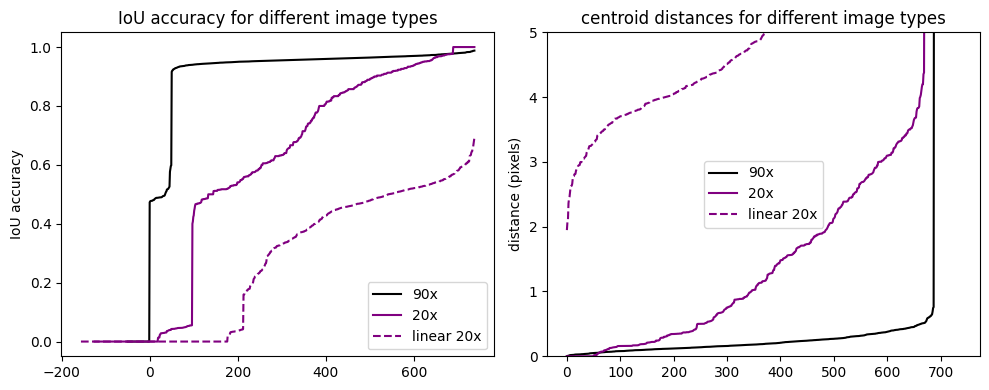

In [12]:
plot_90 = np.append(percarr_90_linear,excess_90_linear*0)
# plot_60 = np.append(percarr_60_linear,excess_60_linear*0)
# plot_40 = np.append(percarr_40_linear,excess_40_linear*0)
# plot_30 = np.append(percarr_30_linear,excess_30_linear*0)
plot_20 = np.append(percarr_20,excess_20*0)
plot_20_linear = np.append(percarr_20_linear,excess_20_linear*0)

fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(np.arange(-len(excess_90_linear),len(percarr_90_linear)),np.sort(plot_90),"-",label="90x",color="black")
# axs[0].plot(np.sort(percarr_60_sr),"-",label="SR 60x",color="green")
# axs[0].plot(np.sort(percarr_40_sr),"-",label="SR 40x",color="cyan")
# axs[0].plot(np.sort(percarr_30_sr),"-",label="SR 30x",color="blue")
# axs[0].plot(np.sort(percarr_20_sr),"-",label="SR 20x",color="purple")
# axs[0].plot(np.sort(percarr_60),"--",label="linear 60x",color="green")
# axs[0].plot(np.sort(percarr_40),"--",label="linear 40x",color="cyan")
# axs[0].plot(np.sort(percarr_30),"--",label="linear 30x",color="blue")
axs[0].plot(np.arange(-len(excess_20),len(percarr_20)),np.sort(plot_20),"-",label="20x",color="purple")
axs[0].plot(np.arange(-len(excess_20_linear),len(percarr_20_linear)),np.sort(plot_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_title("IoU accuracy for different image types")
axs[0].set_ylabel("IoU accuracy")
# axs[0].set_ylim(0.9,1)
axs[0].legend()
axs[1].plot(np.sort(dists_90),"-",label="90x",color="black")
# axs[1].plot(np.sort(dists_60_sr),"-",label="SR 60x",color="green")
# axs[1].plot(np.sort(dists_40_sr),"-",label="SR 40x",color="cyan")
# axs[1].plot(np.sort(dists_30_sr),"-",label="SR 30x",color="blue")
# axs[1].plot(np.sort(dists_20_sr),"-",label="SR 20x",color="purple")
# axs[1].plot(np.sort(dists_60),"--",label="linear 60x",color="green")
# axs[1].plot(np.sort(dists_40),"--",label="linear 40x",color="cyan")
# axs[1].plot(np.sort(dists_30),"--",label="linear 30x",color="blue")
axs[1].plot(np.sort(dists_20),"-",label="20x",color="purple")
axs[1].plot(np.sort(dists_20_linear),"--",label="linear 20x",color="purple")
axs[1].set_title("centroid distances for different image types")
axs[1].set_ylabel("distance (pixels)")
axs[1].set_ylim(0,5)
axs[1].legend()
fig.tight_layout()
plt.show()

In [13]:
# downsample segmentation and ground truth mask pairs and compare the IoUs for hr and lr versions to calibrate this difference

In [14]:
dir_gt = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_tiled/"
masks_gt = [dir_gt + file for file in os.listdir(dir_gt) if "_masks" in file]
dir_seg = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_linear_tiled_90x_segmentations/"
masks_seg = [dir_seg + file for file in os.listdir(dir_seg)]

In [23]:
for i in range(1,9):
    print(207/9*i,2160/9*i)

23.0 240.0
46.0 480.0
69.0 720.0
92.0 960.0
115.0 1200.0
138.0 1440.0
161.0 1680.0
184.0 1920.0


In [36]:
n = range(len(masks_seg))

shapes = [[184,1920],[161,1680],[138,1440],[115,1200],[92,960],[69,720],[46,480],[23,240]] # 207,2160

masks_list = []
segmentations_list = []
for shape in shapes:
    masks = np.zeros([5,shape[0],shape[1]])
    segmentations = np.zeros([5,shape[0],shape[1]])
    i = 0
    for gt,seg in zip(masks_gt, masks_seg):
        mask = np.asarray(Image.open(gt))
        segmentation = np.asarray(Image.open(seg))
        mask = linear_interpolate(mask,shape,"nearest")
        segmentation = linear_interpolate(segmentation,shape,"nearest")
        masks[i] = mask
        segmentations[i] = segmentation
        i += 1
    masks_list.append(masks)
    segmentations_list.append(segmentations)

In [37]:
TILE_LENGTH = 40

In [38]:
from error_algorithms import IoU, centroid_distances, ignore_duplicates

In [41]:
outlist_list = []
for j in range(len(shapes)):
    outlist = []
    exclist = []
    nearlist = []
    distlist = []
    masks = masks_list[j]
    segmentations = segmentations_list[j]
    for i in n:
        mask = masks[i]
        seg = segmentations[i]
        print(mask.shape)
        # plt.imshow(mask,"gray")
        # plt.title(f"mask {i}")
        # plt.show()
        # plt.imshow(seg,"gray")
        # plt.title(f"seg {i}")
        # plt.show()
        width = mask.shape[1]//TILE_LENGTH
        for j in range(TILE_LENGTH):
            maskj = mask[:,width*j:width*(j+1)]
            segj = seg[:,width*j:width*(j+1)]
            out, excess = IoU(maskj,segj)
            outlist.append(out)
            exclist.append(excess)
            nearest, dist = centroid_distances(maskj,segj)
            nearlist.append(nearest)
            distlist.append(dist)
    cells, dists, duplicates, indices = ignore_duplicates(nearlist, distlist)
    dists = np.append(dists, [np.max(dists)]*duplicates)
    perclist = []
    for out in outlist:
        for a,b in out:
            perclist.append(a/b)
    # percarr = np.array(perclist)
    excessout = []
    for exc in exclist:
        excessout.extend(exc)
    # excessarr = np.array(excessout)
    outlist_list.append([np.array(perclist),np.array(excessout)])
# percarr, cells, dists, duplicates, indices, excessarr

(184, 1920)
(184, 1920)
(184, 1920)
(184, 1920)
(184, 1920)
(161, 1680)
(161, 1680)
(161, 1680)
(161, 1680)
(161, 1680)
(138, 1440)
(138, 1440)
(138, 1440)
(138, 1440)
(138, 1440)
(115, 1200)
(115, 1200)
(115, 1200)
(115, 1200)
(115, 1200)
(92, 960)
(92, 960)
(92, 960)
(92, 960)
(92, 960)
(69, 720)
(69, 720)
(69, 720)
(69, 720)
(69, 720)
(46, 480)
(46, 480)
(46, 480)
(46, 480)
(46, 480)
(23, 240)
(23, 240)
(23, 240)
(23, 240)
(23, 240)


In [49]:
print(len((outlist_list[0][1])))
print(len((outlist_list[1][1])))
print(len((outlist_list[2][1])))
print(len((outlist_list[3][1])))
print(len((outlist_list[4][1])))
print(len((outlist_list[5][1])))
print(len((outlist_list[6][1])))
print(len((outlist_list[7][1])))

50
50
50
50
50
50
50
51


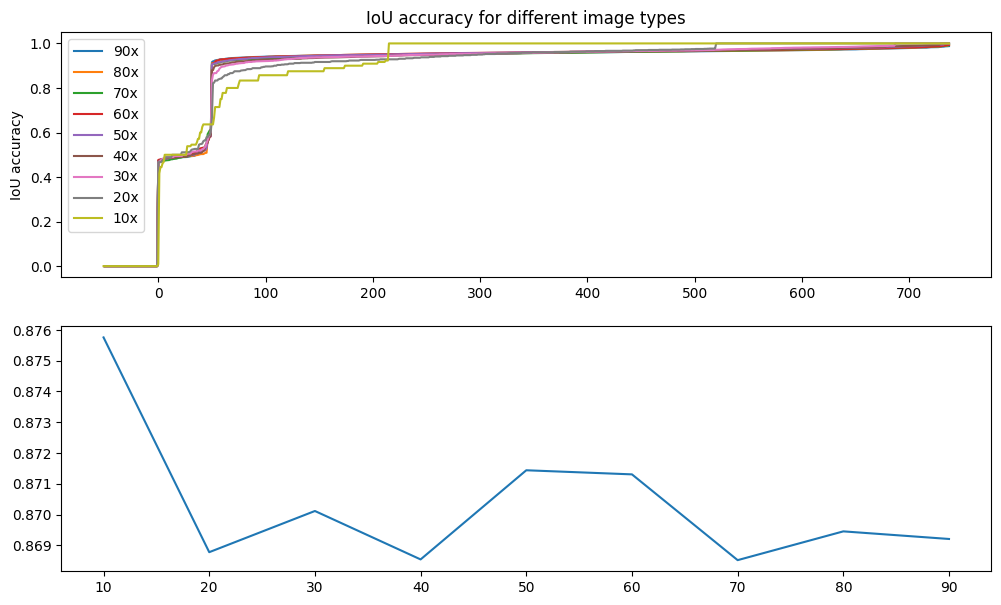

In [44]:
plot_90 = np.append(percarr_90_linear,excess_90_linear*0)
plot_80 = np.append(outlist_list[0][0],outlist_list[0][1]*0)
plot_70 = np.append(outlist_list[1][0],outlist_list[1][1]*0)
plot_60 = np.append(outlist_list[2][0],outlist_list[2][1]*0)
plot_50 = np.append(outlist_list[3][0],outlist_list[3][1]*0)
plot_40 = np.append(outlist_list[4][0],outlist_list[4][1]*0)
plot_30 = np.append(outlist_list[5][0],outlist_list[5][1]*0)
plot_20 = np.append(outlist_list[6][0],outlist_list[6][1]*0)
plot_10 = np.append(outlist_list[7][0],outlist_list[7][1]*0)


fig, axs = plt.subplots(2,1,figsize=(12,7))
axs[0].plot(np.arange(-len(excess_90_linear),len(percarr_90_linear)),np.sort(plot_90),"-",label="90x")
axs[0].plot(np.arange(-len(outlist_list[0][1]),len(outlist_list[0][0])),np.sort(plot_80),"-",label="80x")
axs[0].plot(np.arange(-len(outlist_list[1][1]),len(outlist_list[1][0])),np.sort(plot_70),"-",label="70x")
axs[0].plot(np.arange(-len(outlist_list[2][1]),len(outlist_list[2][0])),np.sort(plot_60),"-",label="60x")
axs[0].plot(np.arange(-len(outlist_list[3][1]),len(outlist_list[3][0])),np.sort(plot_50),"-",label="50x")
axs[0].plot(np.arange(-len(outlist_list[4][1]),len(outlist_list[4][0])),np.sort(plot_40),"-",label="40x")
axs[0].plot(np.arange(-len(outlist_list[5][1]),len(outlist_list[5][0])),np.sort(plot_30),"-",label="30x")
axs[0].plot(np.arange(-len(outlist_list[6][1]),len(outlist_list[6][0])),np.sort(plot_20),"-",label="20x")
axs[0].plot(np.arange(-len(outlist_list[7][1]),len(outlist_list[7][0])),np.sort(plot_10),"-",label="10x")
axs[0].set_title("IoU accuracy for different image types")
axs[0].set_ylabel("IoU accuracy")
axs[0].legend()

xx = [90,80,70,60,50,40,30,20,10]
yy = [plot_90,plot_80,plot_70,plot_60,plot_50,plot_40,plot_30,plot_20,plot_10]

axs[1].plot(xx,[np.mean(y) for y in yy])

plt.show()

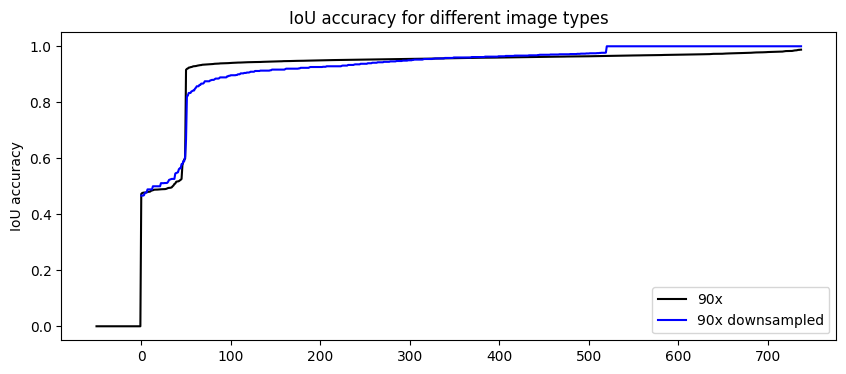

In [19]:
plot_90 = np.append(percarr_90_linear,excess_90_linear*0)
plot_90_small = np.append(percarr,excess*0)

fig, axs = plt.subplots(1,1,figsize=(10,4))
axs.plot(np.arange(-len(excess_90_linear),len(percarr_90_linear)),np.sort(plot_90),"-",label="90x",color="black")
axs.plot(np.arange(-len(excess),len(percarr)),np.sort(plot_90_small),"-",label="90x downsampled",color="blue")
axs.set_title("IoU accuracy for different image types")
axs.set_ylabel("IoU accuracy")
axs.legend()
plt.show()

In [20]:
np.mean(percarr_90_linear), np.mean(plot_90_small)

(0.928094391516026, 0.927636026727861)

In [47]:
import os

def find_txt_files(folder):
    txt_files = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".txt"):
                txt_files.append(os.path.join(root, file))
    return txt_files

# Specify the folder path here
folder_path = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/Project"
# folder_path = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2"

# Call the function to find .txt files within the folder
txt_files = find_txt_files(folder_path)

# Print the list of .txt files
for file in txt_files:
    print(file)


C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/Project\notes.txt
C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/Project\SyMBac\docs\source\requirements.txt
C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/Project\SyMBac\SyMBac\external\DeLTA\data_structure.txt


In [48]:
folder_path = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2"

# Call the function to find .txt files within the folder
txt_files = find_txt_files(folder_path)

# Print the list of .txt files
for file in txt_files:
    print(file)

C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2\RCAN_files\requirements.txt
C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2\RCAN_files\RCAN_TestCode\PSNR_SSIM_Results_BI_model.txt
C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2\RCAN_files\RCAN_TrainCode\experiment\RCAN_BIX2_G10R20P48-2023-05-06-23-02-01.txt
C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2\RCAN_files\RCAN_TrainCode\experiment\RCAN_BIX3_G10R20P48-2023-05-06-23-02-29.txt
C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2\RCAN_files\RCAN_TrainCode\experiment\RCAN_BIX4_G10R20P48-2023-05-06-23-02-35.txt
C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2\RCAN_files\RCAN_TrainCode\experiment\RCAN_BIX8_G10R20P48-2023-05-06-23-02-37.txt
C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2\RCAN_files\RCAN_TrainCode\experiment\model\Network_RCAN_BIX2_G10R20P48-2018-07-15-20-14-55.txt
C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2\superres\train_command.txt
C:/Users/robho